In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df=pd.read_csv('placement.csv')

In [34]:
df.sample(3)

,cgpa,placement_exam_marks,placed
732,7.26,55.0,1
219,5.48,3.0,0
67,8.04,18.0,1


C:\Users\Personal\AppData\Local\Temp\ipykernel_15776\3701256933.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Personal\AppData\Local\Temp\ipykernel_15776\3701256933.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

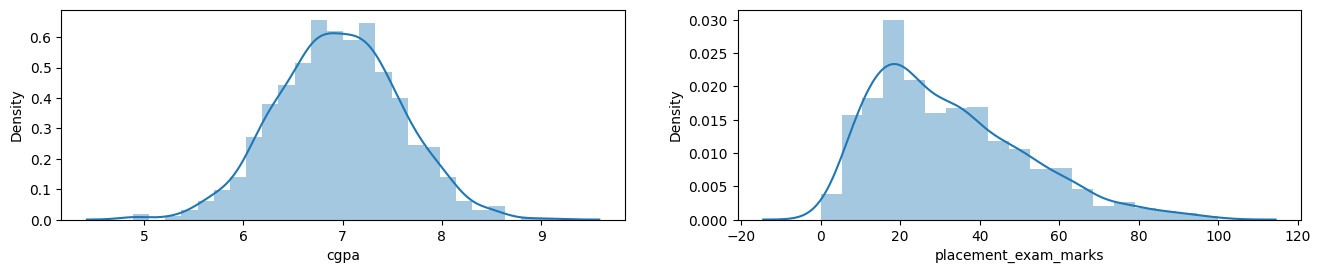

In [35]:
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])
plt.subplot(2,2,2)
sns.distplot(df['placement_exam_marks'])

# Etracting and trimming Outlier on fig 2

<Axes: ylabel='placement_exam_marks'>

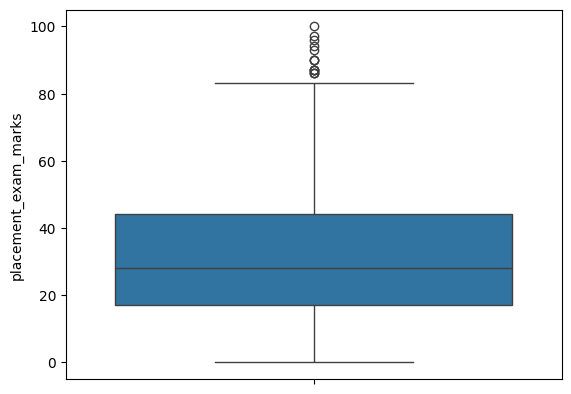

In [36]:
sns.boxplot(df['placement_exam_marks'])

In [37]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [38]:
q1=17
q3=44
iqr=q3-q1
maxallowed=q3+ 1.5*iqr
minallowed=q1- 1.5*iqr
print(maxallowed)
print(minallowed)

84.5
-23.5


In [43]:
df[(df['placement_exam_marks'] < minallowed)|(df['placement_exam_marks'] > maxallowed)].shape

(15, 3)

In [44]:
df.shape

(1000, 3)

In [45]:
new_df=df[(df['placement_exam_marks']<maxallowed)]

In [46]:
new_df.shape

(985, 3)

<Axes: ylabel='placement_exam_marks'>

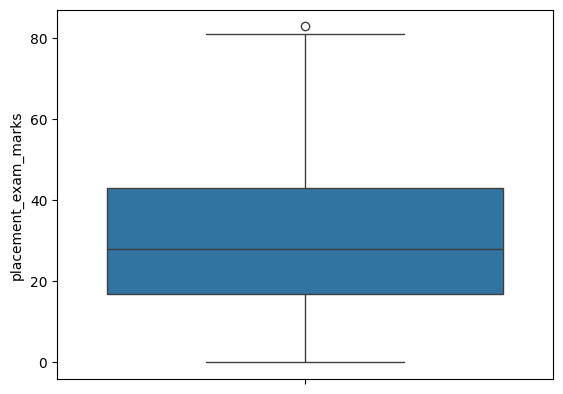

In [48]:
sns.boxplot(new_df['placement_exam_marks'])

# Capping Values 

In [49]:
q1=17
q3=44
iqr=q3-q1
maxallowed=q3+ 1.5*iqr
minallowed=q1- 1.5*iqr
print(maxallowed)
print(minallowed)

84.5
-23.5


In [59]:
new_df=df.copy()
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [65]:
new_df['placement_exam_marks']=np.where(df['placement_exam_marks']>maxallowed,maxallowed,
                                        np.where(df['placement_exam_marks']<minallowed,minallowed,
                                                 df['placement_exam_marks'])
                                       )

In [68]:
type(new_df)

pandas.core.frame.DataFrame

In [72]:
new_df['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

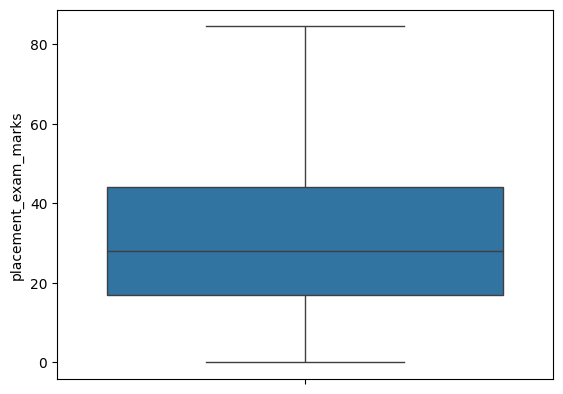

In [73]:
sns.boxplot(new_df['placement_exam_marks'])